In [2]:
import tensorflow as tf
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [3]:
# Configuración del directorio del dataset
ORIGINAL_DATASET_PATH = r"D:\Users\HP\Downloads\ExamenFinal_ia\ExamenFinal_ia\DatasetFinal"  # Cambia esta ruta al dataset original
TEMP_DATASET_PATH = r"D:\Users\HP\Downloads\ExamenFinal_ia\ExamenFinal_ia\DatasetFinal_Temporal0"    # Carpeta donde dividiremos los datos
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15

# Proporciones para dividir
TRAIN_SPLIT = 0.7
VAL_SPLIT = 0.15
TEST_SPLIT = 0.15

In [4]:

# Función para dividir el dataset
def split_dataset(original_path, temp_path, train_split, val_split, test_split):
    if os.path.exists(temp_path):
        shutil.rmtree(temp_path)  # Eliminar si ya existe para evitar conflictos
    os.makedirs(temp_path)

    # Crear subcarpetas para train, val, y test
    train_path = os.path.join(temp_path, 'train')
    val_path = os.path.join(temp_path, 'val')
    test_path = os.path.join(temp_path, 'test')
    os.makedirs(train_path)
    os.makedirs(val_path)
    os.makedirs(test_path)

    for class_name in os.listdir(original_path):
        class_dir = os.path.join(original_path, class_name)
        if not os.path.isdir(class_dir):
            continue  # Ignorar si no es una carpeta
        # Listar todas las imágenes de la clase
        images = os.listdir(class_dir)
        train_images, temp_images = train_test_split(images, test_size=(1 - train_split), random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=test_split / (val_split + test_split), random_state=42)

        # Crear subcarpetas por clase
        os.makedirs(os.path.join(train_path, class_name))
        os.makedirs(os.path.join(val_path, class_name))
        os.makedirs(os.path.join(test_path, class_name))

        # Mover las imágenes a las carpetas respectivas
        for img in train_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_path, class_name, img))
        for img in val_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(val_path, class_name, img))
        for img in test_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(test_path, class_name, img))

    return train_path, val_path, test_path


In [5]:

# Dividir el dataset
train_path, val_path, test_path = split_dataset(ORIGINAL_DATASET_PATH, TEMP_DATASET_PATH, TRAIN_SPLIT, VAL_SPLIT, TEST_SPLIT)


In [ ]:

# Generadores de datos con aumento de datos para entrenamiento
train_datagen = ImageDataGenerator( #Entrenamiento úicamente
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255) #Validaci+on
test_datagen = ImageDataGenerator(rescale=1.0 / 255) #Prueba

In [7]:

# Crear generadores
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Crea modelo desde cero
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])


Found 3038 images belonging to 5 classes.
Found 652 images belonging to 5 classes.
Found 654 images belonging to 5 classes.


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# Entrenamiento del modelo
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.7897 - loss: 0.6337 - val_accuracy: 0.8236 - val_loss: 0.5408
Epoch 2/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.7856 - loss: 0.6391 - val_accuracy: 0.8129 - val_loss: 0.5508
Epoch 3/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.7934 - loss: 0.6491 - val_accuracy: 0.8006 - val_loss: 0.6586
Epoch 4/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.7797 - loss: 0.6385 - val_accuracy: 0.8206 - val_loss: 0.5577
Epoch 5/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.7879 - loss: 0.6422 - val_accuracy: 0.8175 - val_loss: 0.5461
Epoch 6/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.7858 - loss: 0.6232 - val_accuracy: 0.8267 - val_loss: 0.5432
Epoch 7/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.8023 - loss: 0.5828 - val_accuracy: 0.8236 - val_loss: 0.5129
Epoch 8/15
95/95 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.7875 - loss: 0.6229 - val_accuracy: 0.8374 - v

In [11]:

# Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

# Generar matriz de confusión y reporte de clasificación
test_gen.reset()
predictions = np.argmax(model.predict(test_gen), axis=1)
true_labels = test_gen.classes

print("Reporte de Clasificación en Prueba:")
print(classification_report(true_labels, predictions, target_names=list(train_gen.class_indices.keys())))

conf_matrix = confusion_matrix(true_labels, predictions)
print("Matriz de Confusión:")
print(conf_matrix)


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 415ms/step - accuracy: 0.8028 - loss: 0.5314
Test Loss: 0.5664249658584595, Test Accuracy: 0.7966361045837402
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 798ms/step
Reporte de Clasificación en Prueba:
               precision    recall  f1-score   support

high contrast       0.67      0.77      0.71        99
     high key       0.80      0.85      0.82       141
      low key       0.88      0.85      0.87       143
monochromatic       0.66      0.60      0.63        99
      vintage       0.89      0.84      0.86       172

     accuracy                           0.80       654
    macro avg       0.78      0.78      0.78       654
 weighted avg       0.80      0.80      0.80       654

Matriz de Confusión:
[[ 76   8   2   9   4]
 [  9 120   2   5   5]
 [ 10   2 122   7   2]
 [ 15   7  11  59   7]
 [  4  13   2   9 144]]


76 casos fueron predichos correctamente como "high contrast".
8 casos fueron incorrectamente clasificados como "high key".
2 casos fueron clasificados como "low key".
9 casos fueron clasificados como "monochromatic".
4 casos fueron clasificados como "vintage".

-precision: 0.67: 67% de las predicciones para "high contrast" son correctas.
-recall: 0.77: El modelo identificó correctamente el 77% de los casos reales de "high contrast".
--f1-score: 0.71: Combina precision y recall en una métrica única.
support: 99: Hay 99 muestras reales de "high contrast".


-accuracy: 0.80: Precisión global en el conjunto de prueba es del 80%.
-macro avg: Promedio simple de las métricas (no ponderado por el número de muestras).
-weighted avg: Promedio ponderado por la cantidad de muestras en cada clase.

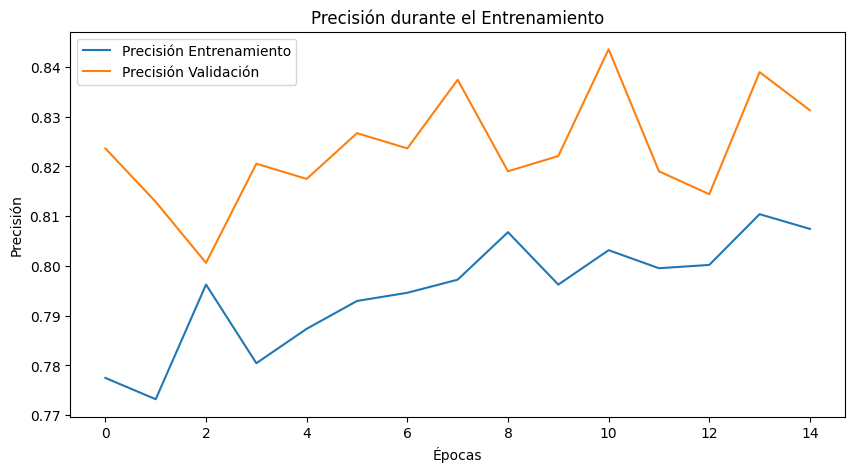

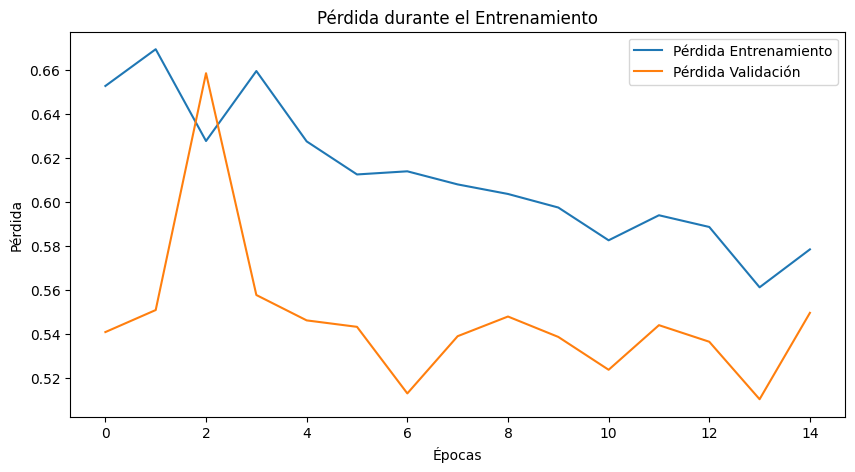

In [12]:

# Graficar desempeño
def plot_metrics(history):
    # Gráfico de precisión
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión Validación')
    plt.title('Precisión durante el Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()

    # Gráfico de pérdida
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida Validación')
    plt.title('Pérdida durante el Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

plot_metrics(history)



In [13]:
# Guardar el modelo
model.save("modelo_estilos_visuales.keras")
